In [3]:
import pathlib

In [17]:
import numpy as np

In [70]:
from fastai.vision import (
    ImageList, 
    cnn_learner,
    models,
    error_rate,
    get_transforms, 
    imagenet_stats,
    ClassificationInterpretation
)

In [9]:
chrono_images_path = pathlib.Path('/home/ubuntu/chrono-analyzer/data')

In [18]:
np.random.seed(42)

In [46]:
data = (
    ImageList.from_folder(chrono_images_path)
    .split_by_rand_pct()
    .label_from_re(r'.*\/(.+)-.+-.+.jpg')
    .transform(get_transforms())
    .databunch()
    .normalize(imagenet_stats)
)

In [47]:
data

ImageDataBunch;

Train: LabelList (3147 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: CategoryList
seiko,iwc,audemarspiguet,rolex,breitling
Path: /home/ubuntu/chrono-analyzer/data;

Valid: LabelList (786 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: CategoryList
movado,zenith,omega,zenith,omega
Path: /home/ubuntu/chrono-analyzer/data;

Test: None

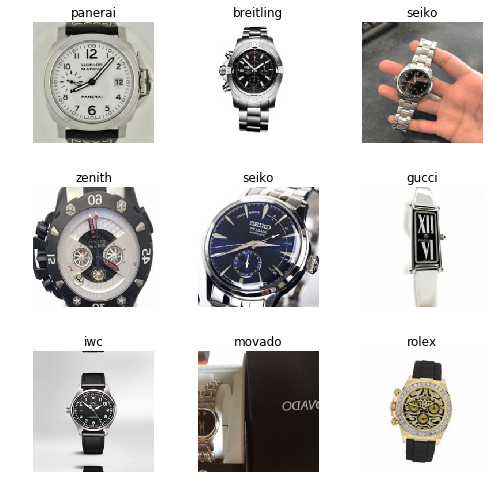

In [49]:
data.show_batch(rows=3, figsize=(7,7))

In [50]:
data.classes

['audemarspiguet',
 'breitling',
 'cartier',
 'gucci',
 'iwc',
 'jaegerlecoultre',
 'movado',
 'omega',
 'panerai',
 'patekphilippe',
 'rolex',
 'seiko',
 'zenith']

In [67]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ubuntu/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [68]:
type(learner)

fastai.basic_train.Learner

In [69]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.932899,1.727945,0.500000,00:35
1,2.093964,1.484422,0.432570,00:24
2,1.626959,1.358889,0.398219,00:24
3,1.309237,1.265061,0.372774,00:24
4,1.084737,1.254289,0.363868,00:24


In [71]:
interpretation = ClassificationInterpretation.from_learner(learner)

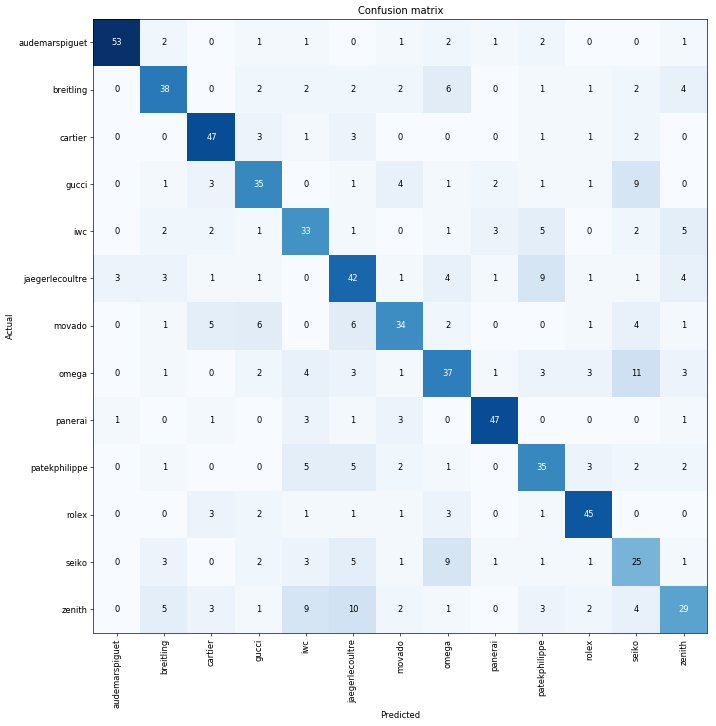

In [72]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [73]:
interpretation.most_confused(min_val=2)

[('omega', 'seiko', 11),
 ('zenith', 'jaegerlecoultre', 10),
 ('gucci', 'seiko', 9),
 ('jaegerlecoultre', 'patekphilippe', 9),
 ('seiko', 'omega', 9),
 ('zenith', 'iwc', 9),
 ('breitling', 'omega', 6),
 ('movado', 'gucci', 6),
 ('movado', 'jaegerlecoultre', 6),
 ('iwc', 'patekphilippe', 5),
 ('iwc', 'zenith', 5),
 ('movado', 'cartier', 5),
 ('patekphilippe', 'iwc', 5),
 ('patekphilippe', 'jaegerlecoultre', 5),
 ('seiko', 'jaegerlecoultre', 5),
 ('zenith', 'breitling', 5),
 ('breitling', 'zenith', 4),
 ('gucci', 'movado', 4),
 ('jaegerlecoultre', 'omega', 4),
 ('jaegerlecoultre', 'zenith', 4),
 ('movado', 'seiko', 4),
 ('omega', 'iwc', 4),
 ('zenith', 'seiko', 4),
 ('cartier', 'gucci', 3),
 ('cartier', 'jaegerlecoultre', 3),
 ('gucci', 'cartier', 3),
 ('iwc', 'panerai', 3),
 ('jaegerlecoultre', 'audemarspiguet', 3),
 ('jaegerlecoultre', 'breitling', 3),
 ('omega', 'jaegerlecoultre', 3),
 ('omega', 'patekphilippe', 3),
 ('omega', 'rolex', 3),
 ('omega', 'zenith', 3),
 ('panerai', 'iwc', 

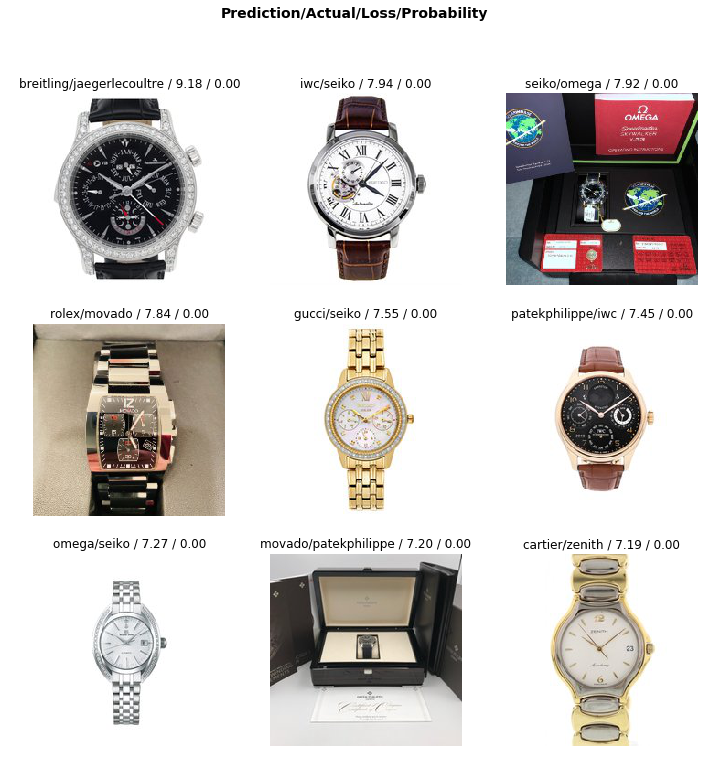

In [74]:
interpretation.plot_top_losses(9, figsize=(12,12))

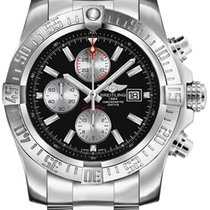

In [103]:
data.valid_ds[108][0]

In [105]:
list(zip(data.classes, learner.predict(data.valid_ds[108][0])[2]))

[('audemarspiguet', tensor(7.4332e-05)),
 ('breitling', tensor(0.9977)),
 ('cartier', tensor(4.5945e-05)),
 ('gucci', tensor(0.0005)),
 ('iwc', tensor(7.7685e-05)),
 ('jaegerlecoultre', tensor(8.2740e-05)),
 ('movado', tensor(0.0002)),
 ('omega', tensor(9.0840e-05)),
 ('panerai', tensor(1.5150e-05)),
 ('patekphilippe', tensor(4.6303e-05)),
 ('rolex', tensor(0.0001)),
 ('seiko', tensor(4.4237e-05)),
 ('zenith', tensor(0.0010))]

In [89]:
learner.save('stage-1')

In [96]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


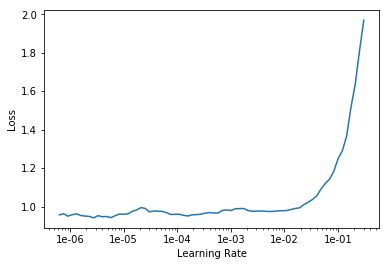

In [97]:
learner.recorder.plot()

In [98]:
learner.unfreeze()

In [100]:
learner.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.328280,1.488236,0.335878,00:34
1,0.916054,1.659805,0.454198,00:34
2,0.835436,1.140823,0.298982,00:34
3,0.572796,0.892378,0.245547,00:34
4,0.351301,0.814781,0.220102,00:34


In [107]:
learner.save('stage-2')

In [108]:
learner.export('classifier.pkl')